<a href="https://colab.research.google.com/github/bikash-bhoi/EIP4/blob/master/Session11/Session_11_CIFAR_ocp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
##Clone Github Directory to import packages
%%bash
mkdir temp
git clone https://github.com/bikash-bhoi/eva4.git temp
if [ ! -d ./models ]; then
    mkdir models
fi
if [ ! -d ./utils ]; then
    mkdir utils
fi
cp -r temp/models/* ./models
cp -r temp/utils/* ./utils
rm -rf temp

Cloning into 'temp'...


In [0]:
!pip install pytorch-gradcam
!pip install albumentations
!pip install --no-cache-dir git+https://github.com/NVIDIA/apex

In [0]:
from utils.download_load import download_load
from utils.display_imgs import display_imgs
from utils.train_test import train , test, predict, get_misclassified
from utils.disp_summary import disp_summary
from utils.gradcam import grad_cam, gradcam_plot
from models.custom_resnet import cust_resnet
from utils.range_test import lr_range_test

import torch.optim as optim
from torch.optim.lr_scheduler import ReduceLROnPlateau, OneCycleLR
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms
import matplotlib.pyplot as plt
#%matplotlib inline
import numpy as np
import torchvision
import torchsummary
from torchsummary import summary
import torch

In [4]:
trainset, testset, train_loader, test_loader, classes =download_load(train_bs=512,test_bs=512)

CUDA Available? True
Files already downloaded and verified
Files already downloaded and verified


In [0]:
display_imgs(train_loader, classes)

In [0]:
use_cuda= torch.cuda.is_available()
device=torch.device('cuda' if use_cuda else 'cpu')
model=cust_resnet().to(device)

In [6]:
disp_summary(model)

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 64, 32, 32]           1,728
       BatchNorm2d-2           [-1, 64, 32, 32]             128
              ReLU-3           [-1, 64, 32, 32]               0
            Conv2d-4          [-1, 128, 32, 32]          73,728
         MaxPool2d-5          [-1, 128, 16, 16]               0
       BatchNorm2d-6          [-1, 128, 16, 16]             256
              ReLU-7          [-1, 128, 16, 16]               0
            Conv2d-8          [-1, 128, 16, 16]         147,456
       BatchNorm2d-9          [-1, 128, 16, 16]             256
             ReLU-10          [-1, 128, 16, 16]               0
           Conv2d-11          [-1, 128, 16, 16]         147,456
      BatchNorm2d-12          [-1, 128, 16, 16]             256
             ReLU-13          [-1, 128, 16, 16]               0
           Conv2d-14          [-1, 256,

/content/models/custom_resnet.py:74: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  x=F.log_softmax(x)


  0%|          | 0/98 [00:00<?, ?it/s]

LR: 0.001


/content/models/custom_resnet.py:74: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  x=F.log_softmax(x)
Loss=1.4925683736801147 Batch_id=97 Accuracy=34.08: 100%|██████████| 98/98 [00:29<00:00,  3.36it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 1.4069, Accuracy: 4958/10000 (49.58%)

LR: 0.002


Loss=1.482698917388916 Batch_id=97 Accuracy=38.41: 100%|██████████| 98/98 [00:29<00:00,  3.29it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 1.3388, Accuracy: 5175/10000 (51.75%)

LR: 0.003


Loss=1.448546051979065 Batch_id=97 Accuracy=39.82: 100%|██████████| 98/98 [00:29<00:00,  3.27it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 1.2909, Accuracy: 5310/10000 (53.10%)

LR: 0.004


Loss=1.4467856884002686 Batch_id=97 Accuracy=40.38: 100%|██████████| 98/98 [00:30<00:00,  3.24it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 1.1975, Accuracy: 5690/10000 (56.90%)

LR: 0.005


Loss=1.4823638200759888 Batch_id=97 Accuracy=30.99: 100%|██████████| 98/98 [00:29<00:00,  3.31it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 1.5630, Accuracy: 4380/10000 (43.80%)

LR: 0.006


Loss=1.667422890663147 Batch_id=97 Accuracy=31.12: 100%|██████████| 98/98 [00:29<00:00,  3.28it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 1.4593, Accuracy: 4597/10000 (45.97%)

LR: 0.007


Loss=1.6842422485351562 Batch_id=97 Accuracy=28.51: 100%|██████████| 98/98 [00:29<00:00,  3.27it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 1.7684, Accuracy: 3834/10000 (38.34%)

LR: 0.008


Loss=1.8021619319915771 Batch_id=97 Accuracy=25.42: 100%|██████████| 98/98 [00:29<00:00,  3.28it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 1.7915, Accuracy: 3944/10000 (39.44%)

LR: 0.009000000000000001


Loss=1.8545399904251099 Batch_id=97 Accuracy=22.88: 100%|██████████| 98/98 [00:29<00:00,  3.27it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 1.8223, Accuracy: 3532/10000 (35.32%)

LR: 0.01


Loss=2.0135600566864014 Batch_id=97 Accuracy=19.57: 100%|██████████| 98/98 [00:29<00:00,  3.29it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 2.0442, Accuracy: 3239/10000 (32.39%)

LR: 0.01


Loss=1.9437150955200195 Batch_id=97 Accuracy=19.19: 100%|██████████| 98/98 [00:29<00:00,  3.32it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 1.8323, Accuracy: 3216/10000 (32.16%)

LR: 0.02


Loss=2.2648959159851074 Batch_id=97 Accuracy=15.47: 100%|██████████| 98/98 [00:29<00:00,  3.36it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 2.1899, Accuracy: 1947/10000 (19.47%)

LR: 0.03


Loss=3.2743992805480957 Batch_id=97 Accuracy=11.62: 100%|██████████| 98/98 [00:28<00:00,  3.39it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 2.8886, Accuracy: 1233/10000 (12.33%)

LR: 0.04


Loss=2.4694409370422363 Batch_id=97 Accuracy=10.59: 100%|██████████| 98/98 [00:29<00:00,  3.38it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 2.4694, Accuracy: 1062/10000 (10.62%)

LR: 0.05


Loss=3.1513118743896484 Batch_id=97 Accuracy=10.59: 100%|██████████| 98/98 [00:29<00:00,  3.36it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 2.4067, Accuracy: 1143/10000 (11.43%)

LR: 0.06


Loss=2.3021740913391113 Batch_id=97 Accuracy=10.24: 100%|██████████| 98/98 [00:28<00:00,  3.39it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 2.3044, Accuracy: 1147/10000 (11.47%)

LR: 0.07


Loss=2.2833569049835205 Batch_id=97 Accuracy=10.13: 100%|██████████| 98/98 [00:28<00:00,  3.42it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 2.3049, Accuracy: 1087/10000 (10.87%)

LR: 0.08


Loss=2.3006951808929443 Batch_id=97 Accuracy=10.44: 100%|██████████| 98/98 [00:28<00:00,  3.46it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 2.3008, Accuracy: 1146/10000 (11.46%)

LR: 0.09


Loss=2.0750198364257812 Batch_id=97 Accuracy=11.80: 100%|██████████| 98/98 [00:28<00:00,  3.41it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 2.1520, Accuracy: 1806/10000 (18.06%)

LR: 0.1


Loss=2.309575319290161 Batch_id=97 Accuracy=10.12: 100%|██████████| 98/98 [00:28<00:00,  3.48it/s]



Test set: Average loss: 2.2754, Accuracy: 1064/10000 (10.64%)



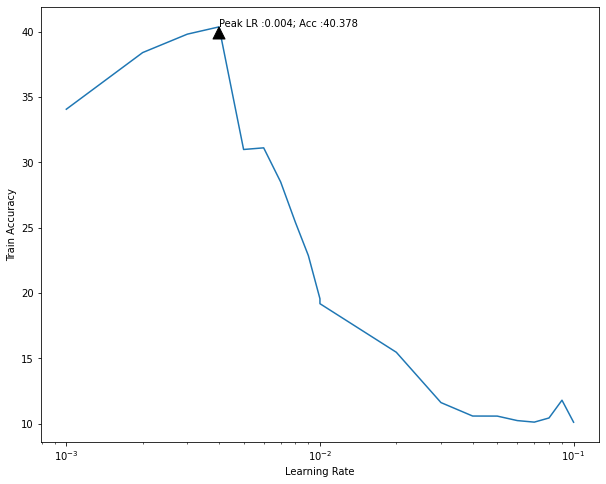

LRs used for range  test :  [0.001, 0.002, 0.003, 0.004, 0.005, 0.006, 0.007, 0.008, 0.009000000000000001, 0.01, 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1]
Train Accuracies :  [34.076, 38.412, 39.822, 40.378, 30.994, 31.12, 28.508, 25.424, 22.876, 19.57, 19.192, 15.474, 11.622, 10.592, 10.588, 10.244, 10.126, 10.444, 11.804, 10.118]
Test acc:  40.378 LR:  0.004


In [8]:
lrs = [j*(10**i) for i in range(-3,-1) for j in range(1,11)]
model = cust_resnet()
lr_range_test(lrs,model,device,train_loader, test_loader)


In [10]:
device= 'cuda' if torch.cuda.is_available() else 'cpu'
model = cust_resnet().to(device)
optimizer = optim.SGD(model.parameters(), lr=0.01,  momentum=0.9)
scheduler = OneCycleLR(optimizer, max_lr=0.03,  total_steps=24,pct_start=0.2083, final_div_factor=1, div_factor=10)
lrs=[]

for epoch in range(1, 25):
    curr_lr=optimizer.param_groups[0]['lr']
    lrs.append(curr_lr)
    print(f'Epoch: {epoch} Learning_Rate {curr_lr}')
    train_acc1 = train(model, device, train_loader, optimizer, epoch)
    test_acc1 = test(model, device, test_loader)
    print('Test acc:', test_acc1)
    scheduler.step()


  0%|          | 0/98 [00:00<?, ?it/s]

Epoch: 1 Learning_Rate 0.002999999999999999


/content/models/custom_resnet.py:74: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  x=F.log_softmax(x)
Loss=1.3793246746063232 Batch_id=97 Accuracy=36.69: 100%|██████████| 98/98 [00:30<00:00,  3.21it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 1.2689, Accuracy: 5354/10000 (53.54%)

Test acc: 53.54
Epoch: 2 Learning_Rate 0.006955558344737111


Loss=1.3003016710281372 Batch_id=97 Accuracy=52.38: 100%|██████████| 98/98 [00:30<00:00,  3.19it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 1.2353, Accuracy: 5645/10000 (56.45%)

Test acc: 56.45
Epoch: 3 Learning_Rate 0.016504241998412234


Loss=1.0251619815826416 Batch_id=97 Accuracy=56.89: 100%|██████████| 98/98 [00:30<00:00,  3.22it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 1.0076, Accuracy: 6626/10000 (66.26%)

Test acc: 66.26
Epoch: 4 Learning_Rate 0.02605043980435138


Loss=0.8906236290931702 Batch_id=97 Accuracy=62.66: 100%|██████████| 98/98 [00:30<00:00,  3.17it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.9961, Accuracy: 6943/10000 (69.43%)

Test acc: 69.43
Epoch: 5 Learning_Rate 0.029999999881902766


Loss=0.9786694645881653 Batch_id=97 Accuracy=68.62: 100%|██████████| 98/98 [00:30<00:00,  3.19it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.8133, Accuracy: 7420/10000 (74.20%)

Test acc: 74.2
Epoch: 6 Learning_Rate 0.02981559904845503


Loss=0.9494925141334534 Batch_id=97 Accuracy=71.65: 100%|██████████| 98/98 [00:30<00:00,  3.18it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.8510, Accuracy: 7410/10000 (74.10%)

Test acc: 74.1
Epoch: 7 Learning_Rate 0.029268013899015125


Loss=0.8729277849197388 Batch_id=97 Accuracy=74.34: 100%|██████████| 98/98 [00:30<00:00,  3.18it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.6441, Accuracy: 8007/10000 (80.07%)

Test acc: 80.07
Epoch: 8 Learning_Rate 0.02837217987413087


Loss=0.7292106747627258 Batch_id=97 Accuracy=76.21: 100%|██████████| 98/98 [00:30<00:00,  3.20it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.5585, Accuracy: 8142/10000 (81.42%)

Test acc: 81.42
Epoch: 9 Learning_Rate 0.027152530937785864


Loss=0.6896645426750183 Batch_id=97 Accuracy=77.99: 100%|██████████| 98/98 [00:30<00:00,  3.16it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.5547, Accuracy: 8214/10000 (82.14%)

Test acc: 82.14
Epoch: 10 Learning_Rate 0.025642333138551056


Loss=0.5835291147232056 Batch_id=97 Accuracy=79.50: 100%|██████████| 98/98 [00:30<00:00,  3.17it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.4844, Accuracy: 8420/10000 (84.20%)

Test acc: 84.2
Epoch: 11 Learning_Rate 0.023882777274732408


Loss=0.49893873929977417 Batch_id=97 Accuracy=79.70: 100%|██████████| 98/98 [00:30<00:00,  3.18it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.5108, Accuracy: 8383/10000 (83.83%)

Test acc: 83.83
Epoch: 12 Learning_Rate 0.021921855411164964


Loss=0.5271540284156799 Batch_id=97 Accuracy=81.92: 100%|██████████| 98/98 [00:31<00:00,  3.15it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.4544, Accuracy: 8537/10000 (85.37%)

Test acc: 85.37
Epoch: 13 Learning_Rate 0.01981305189077181


Loss=0.48757070302963257 Batch_id=97 Accuracy=83.16: 100%|██████████| 98/98 [00:30<00:00,  3.18it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.4176, Accuracy: 8626/10000 (86.26%)

Test acc: 86.26
Epoch: 14 Learning_Rate 0.01761388454368051


Loss=0.4580290615558624 Batch_id=97 Accuracy=83.26: 100%|██████████| 98/98 [00:30<00:00,  3.20it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.4318, Accuracy: 8593/10000 (85.93%)

Test acc: 85.93
Epoch: 15 Learning_Rate 0.01538433588256656


Loss=0.444222629070282 Batch_id=97 Accuracy=84.34: 100%|██████████| 98/98 [00:31<00:00,  3.15it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.4384, Accuracy: 8623/10000 (86.23%)

Test acc: 86.23
Epoch: 16 Learning_Rate 0.01318521707353006


Loss=0.39134088158607483 Batch_id=97 Accuracy=85.65: 100%|██████████| 98/98 [00:30<00:00,  3.17it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.4382, Accuracy: 8604/10000 (86.04%)

Test acc: 86.04
Epoch: 17 Learning_Rate 0.011076509305366113


Loss=0.4018968343734741 Batch_id=97 Accuracy=85.98: 100%|██████████| 98/98 [00:31<00:00,  3.14it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.3829, Accuracy: 8784/10000 (87.84%)

Test acc: 87.84
Epoch: 18 Learning_Rate 0.009115727796550531


Loss=0.4141755700111389 Batch_id=97 Accuracy=86.71: 100%|██████████| 98/98 [00:31<00:00,  3.14it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.3437, Accuracy: 8870/10000 (88.70%)

Test acc: 88.7
Epoch: 19 Learning_Rate 0.007356353061816279


Loss=0.3709797263145447 Batch_id=97 Accuracy=87.78: 100%|██████████| 98/98 [00:30<00:00,  3.16it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.3333, Accuracy: 8890/10000 (88.90%)

Test acc: 88.9
Epoch: 20 Learning_Rate 0.005846372225684242


Loss=0.41547590494155884 Batch_id=97 Accuracy=87.97: 100%|██████████| 98/98 [00:30<00:00,  3.17it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.3327, Accuracy: 8916/10000 (89.16%)

Test acc: 89.16
Epoch: 21 Learning_Rate 0.00462697016876973


Loss=0.30926215648651123 Batch_id=97 Accuracy=88.97: 100%|██████████| 98/98 [00:31<00:00,  3.14it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.3231, Accuracy: 8927/10000 (89.27%)

Test acc: 89.27
Epoch: 22 Learning_Rate 0.0037314062059821424


Loss=0.27468809485435486 Batch_id=97 Accuracy=89.71: 100%|██████████| 98/98 [00:31<00:00,  3.15it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.3061, Accuracy: 9003/10000 (90.03%)

Test acc: 90.03
Epoch: 23 Learning_Rate 0.0031841069353339816


Loss=0.27790218591690063 Batch_id=97 Accuracy=89.90: 100%|██████████| 98/98 [00:30<00:00,  3.18it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.2991, Accuracy: 9017/10000 (90.17%)

Test acc: 90.17
Epoch: 24 Learning_Rate 0.003


Loss=0.20267312228679657 Batch_id=97 Accuracy=90.21: 100%|██████████| 98/98 [00:31<00:00,  3.16it/s]



Test set: Average loss: 0.2945, Accuracy: 9050/10000 (90.50%)

Test acc: 90.5


In [0]:
from google.colab import drive
drive.mount('/content/gdrive',force_remount=True)
PATH = '/content/gdrive/My Drive/Colab Notebooks/eva4_s9/assignment11_ResNetcust_model.h5'
!touch PATH
torch.save(model.state_dict(), PATH)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


/content/models/resnet.py:96: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.log_softmax(out)
/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:2416: UserWarning: nn.functional.upsample is deprecated. Use nn.functional.interpolate instead.
  warnings.warn("nn.functional.upsample is deprecated. Use nn.functional.interpolate instead.")
/content/utils/gradcam.py:46: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig,ax = plt.subplots(1,2)


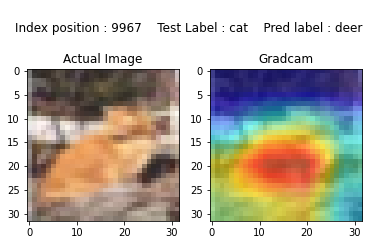

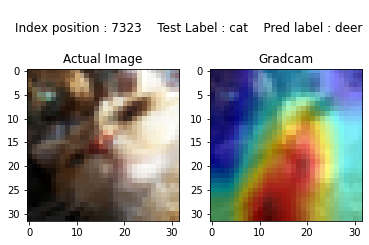

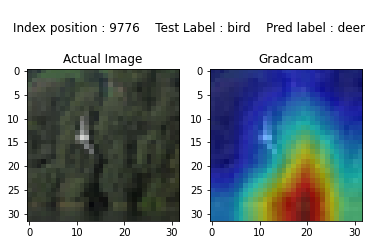

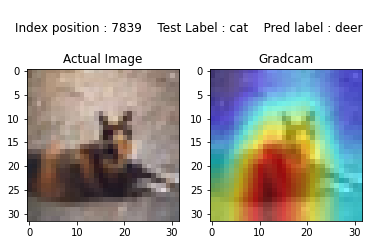

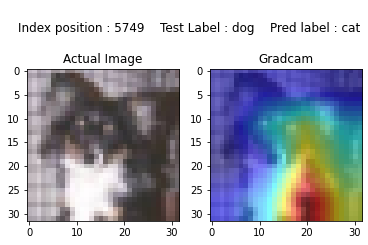

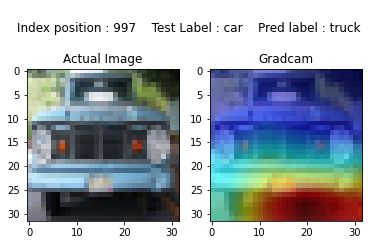

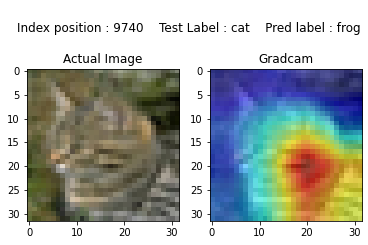

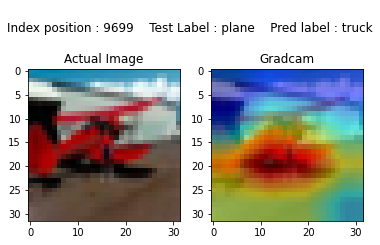

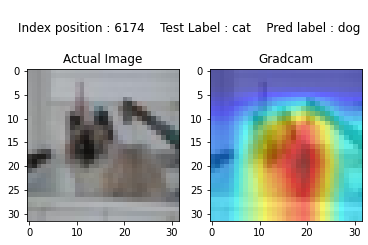

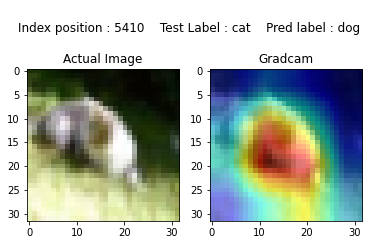

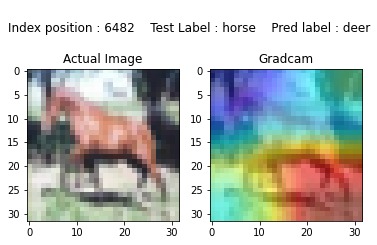

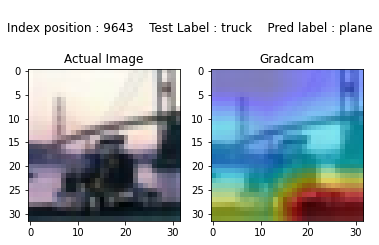

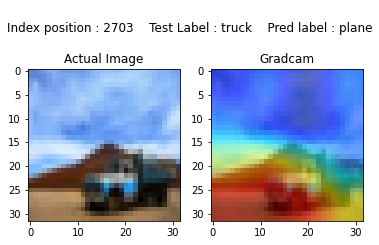

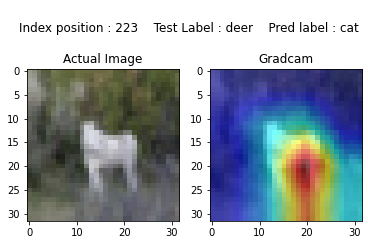

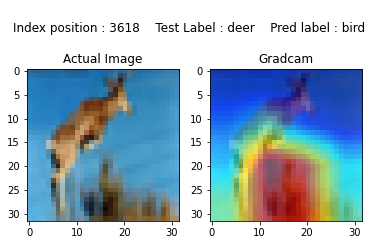

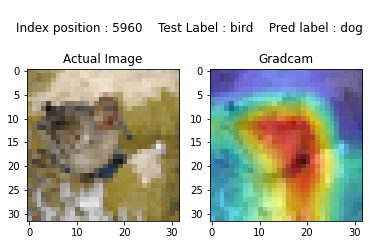

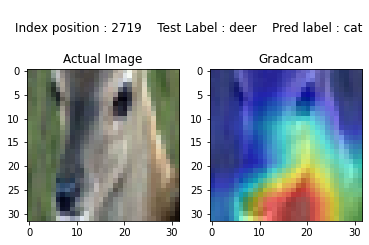

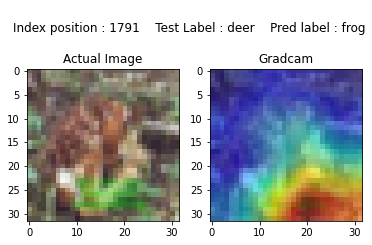

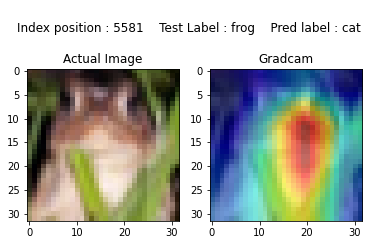

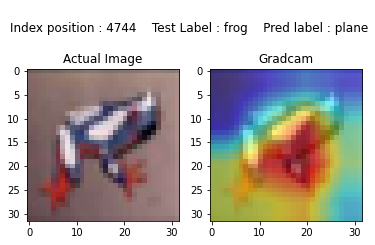

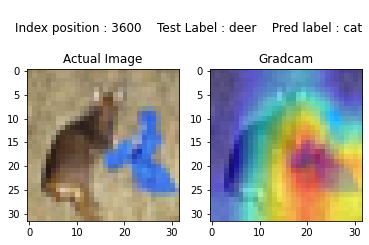

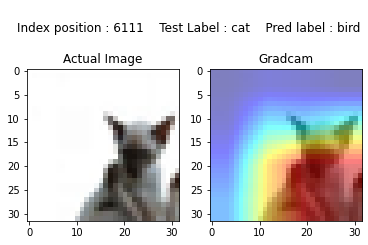

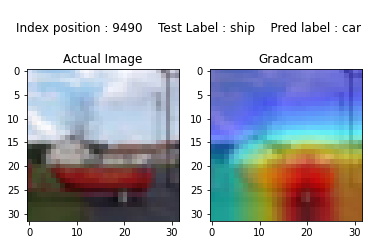

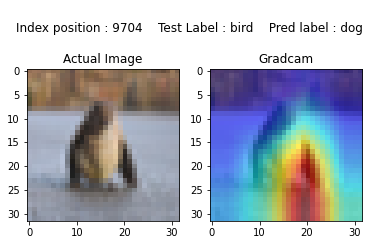

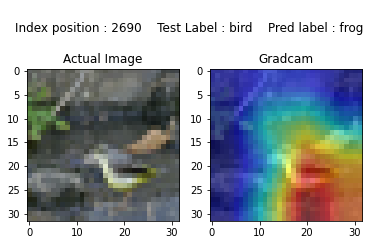

In [0]:
device= 'cuda' if torch.cuda.is_available() else 'cpu'
pred = predict(model,device,test_loader)
correct,missclassified = get_misclassified(pred,testset.targets)

layer='layer4'
gradcam_plot(layer,model,missclassified,25,testset,classes)
